🧪 Cell 1: Import and Setup

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Adjust settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Load merged dataset
df = pd.read_csv('../data/processed/movies.csv')
df.head()

,user_id,movie_id,rating,timestamp,title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,Heavyweights (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Heavyweights%...,0,0,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,Jackie Brown (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?imdb-title-11...,0,0,...,0,0,0,0,0,0,0,0,0,0


📊 Cell 2: Ratings Distribution

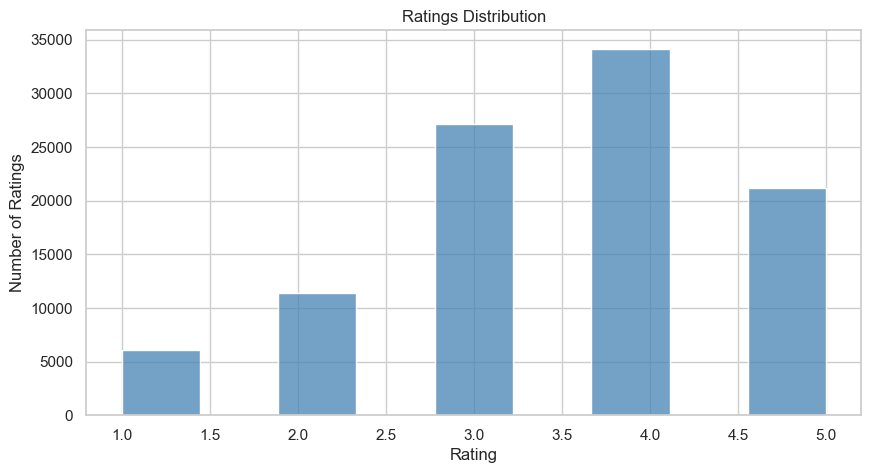

In [4]:
sns.histplot(df['rating'], bins=9, kde=False, color='steelblue')
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.savefig("../outputs/ratings_distribution.png")
plt.show()

🎬 Cell 3: Top 20 Most Rated Movies

C:\Users\MSI\AppData\Local\Temp\ipykernel_21632\3730890999.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rated.index, x=top_rated.values, palette="viridis")


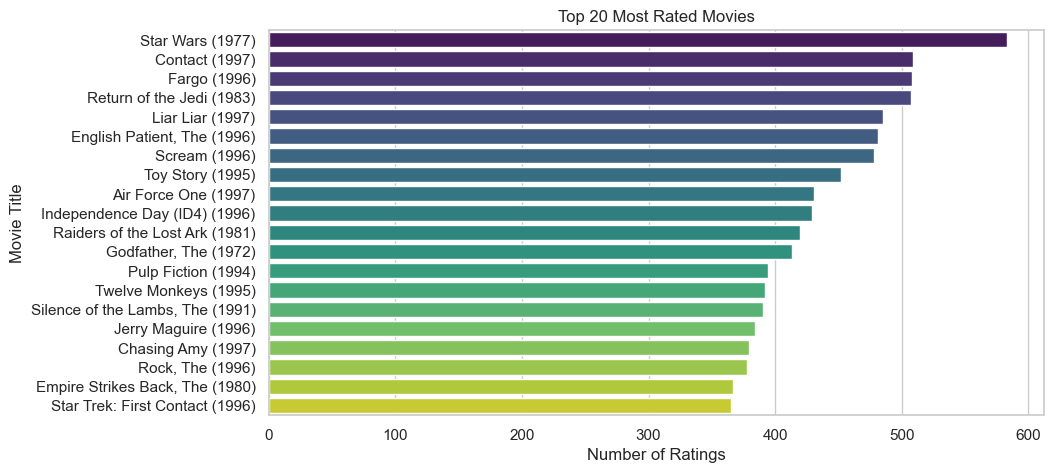

In [5]:
top_rated = df.groupby('title')['rating'].count().sort_values(ascending=False).head(20)

sns.barplot(y=top_rated.index, x=top_rated.values, palette="viridis")
plt.title("Top 20 Most Rated Movies")
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.savefig("../outputs/top_20_most_rated.png", bbox_inches='tight')
plt.show()


⭐ Cell 4: Top 20 Highest Rated Movies (with ≥ 100 ratings)

C:\Users\MSI\AppData\Local\Temp\ipykernel_21632\1461761563.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=popular_avg_ratings.index, x=popular_avg_ratings.values, palette="magma")


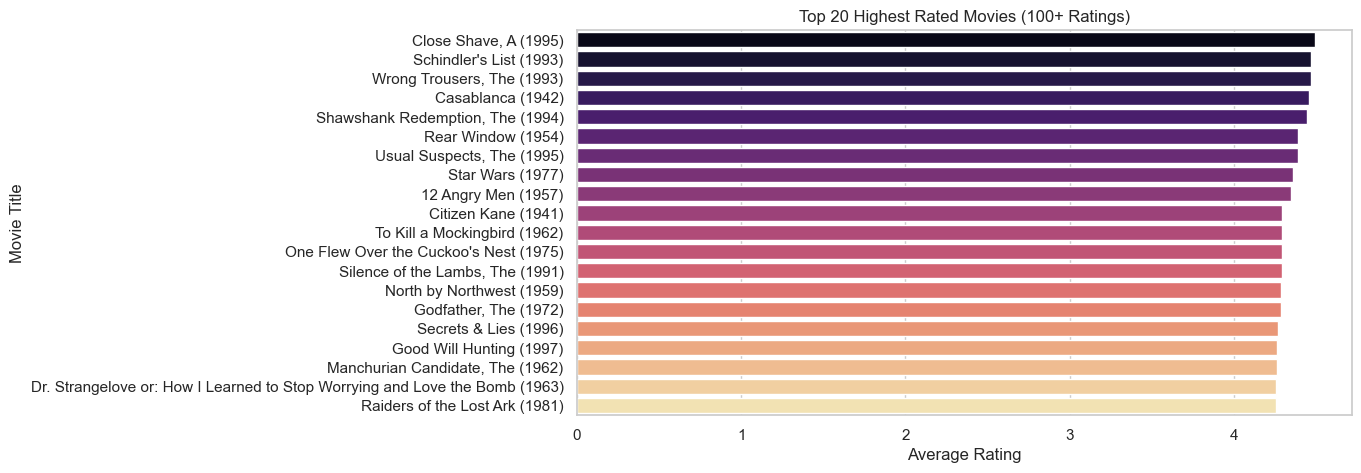

In [6]:
rating_counts = df.groupby('title')['rating'].count()
avg_ratings = df.groupby('title')['rating'].mean()

popular = rating_counts[rating_counts >= 100].index
popular_avg_ratings = avg_ratings[popular].sort_values(ascending=False).head(20)

sns.barplot(y=popular_avg_ratings.index, x=popular_avg_ratings.values, palette="magma")
plt.title("Top 20 Highest Rated Movies (100+ Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.savefig("../outputs/top_20_highest_rated.png", bbox_inches='tight')
plt.show()


🎞️ Cell 5: Genre Heatmap

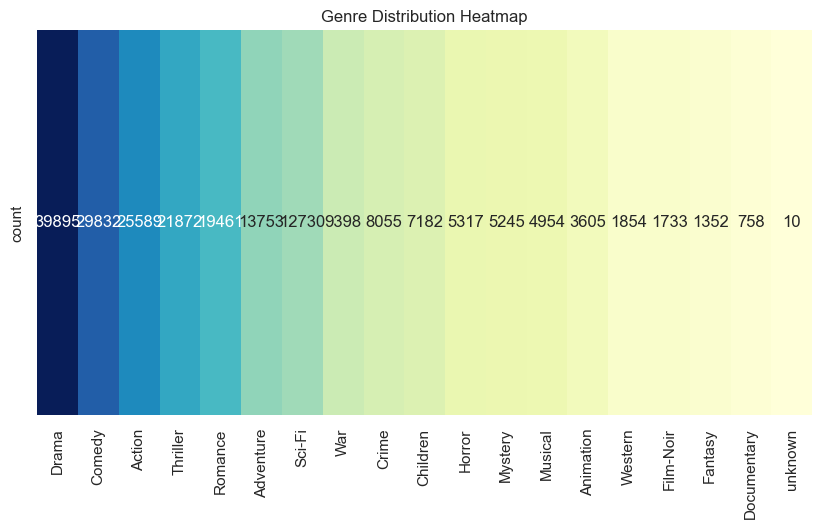

In [7]:
genre_cols = ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy',
              'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
              'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_sum = df[genre_cols].sum().sort_values(ascending=False).to_frame(name='count')

sns.heatmap(genre_sum.T, annot=True, fmt='d', cmap='YlGnBu', cbar=False)
plt.title("Genre Distribution Heatmap")
plt.savefig("../outputs/genre_heatmap.png", bbox_inches='tight')
plt.show()


☁️ Cell 6: Word Cloud of Movie Titles

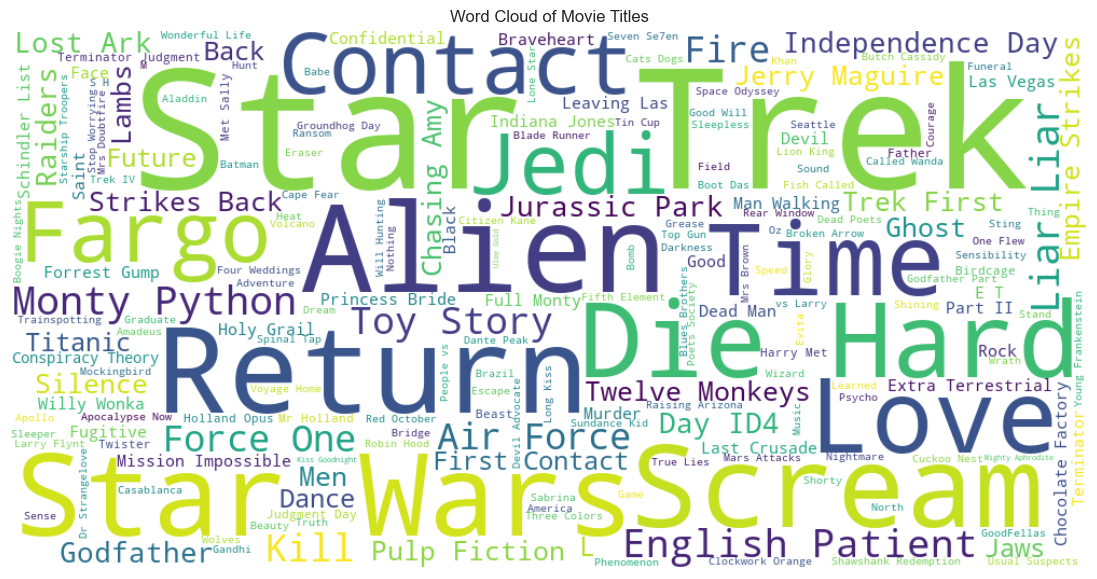

In [8]:
text = " ".join(df['title'].dropna().tolist())

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Movie Titles")
plt.savefig("../outputs/wordcloud_titles.png", bbox_inches='tight')
plt.show()


🧼 Cell 7: Optional - Save Plots as PNGs (if skipped above)

In [9]:
os.makedirs("../outputs", exist_ok=True)
# Already handled in previous cells, included for completeness.